**Hammad Latif**

In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.9 MB/s eta 0:00:00


In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Text Processing Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Topic Modeling Libraries
from gensim import corpora
from gensim.models import LdaModel

# Visualization Libraries
import pyLDAvis
import pyLDAvis.gensim_models

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Load the laptop reviews data
data = pd.read_csv('/content/sample_data/amazon_review.csv')  # Adjust the file path as necessary
reviews = data['comments'].astype(str).tolist()  # Ensure reviews are strings


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(reviews)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


511

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags (needed for lemmatization)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS tag isn't recognized

# Preprocessing function
def preprocess_text(text):
    # Remove non-alphabet characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)
    # Lemmatize, remove stopwords, and use POS tagging for better accuracy
    tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
        if word not in stop_words
    ]
    return tokens

# Apply preprocessing to each review
processed_reviews = [preprocess_text(review) for review in reviews]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(processed_reviews)

[['slow', 'good', 'gb', 'ram', 'accord', 'speed', 'slow', 'hang', 'bad', 'laptop', 'plz', 'dont', 'money', 'west'], ['really', 'hate', 'product', 'wastage', 'money', 'take', 'long', 'start', 'make', 'wierd', 'noice', 'background', 'heavy', 'large', 'handy', 'olworst', 'part', 'even', 'ready', 'refund', 'replace', 'really', 'piss'], ['product', 'worth'], ['browser', 'support', 'html', 'video', 'please', 'dont', 'buy', 'laptop', 'screen', 'keep', 'freeze', 'buy', 'laptop', 'daughter', 'online', 'class', 'every', 'mins', 'whether', 'use', 'zoom', 'microsoft', 'team', 'keep', 'freeze', 'processor', 'slow', 'come', 'back', 'hp', 'brand', 'gap', 'year', 'remind', 'stay', 'away', 'year', 'please', 'waste', 'hard', 'earn', 'money'], ['review', 'month', 'usagei', 'azuz', 'laptop', 'since', 'many', 'problem', 'operate', 'order', 'one', 'first', 'good', 'keep', 'switch', 'time', 'first', 'hr', 'battery', 'hrs', 'happy', 'purchase'], ['purchase', 'grau', 'tb', 'hdd', 'ssd', 'ryzen', 'economical', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Create bigrams and trigrams models
bigram = Phrases(processed_reviews, min_count=3, threshold=10)
trigram = Phrases(bigram[processed_reviews], threshold=10)

# Faster application using Phraser
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Apply bigrams and trigrams to the reviews
processed_reviews = [trigram_mod[bigram_mod[review]] for review in processed_reviews]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(processed_reviews)

[['slow', 'good', 'gb_ram', 'accord', 'speed', 'slow_hang', 'bad', 'laptop', 'plz', 'dont', 'money', 'west'], ['really', 'hate', 'product', 'wastage', 'money', 'take', 'long', 'start', 'make', 'wierd', 'noice', 'background', 'heavy', 'large', 'handy', 'olworst', 'part', 'even', 'ready', 'refund', 'replace', 'really', 'piss'], ['product', 'worth'], ['browser_support_html_video', 'please_dont', 'buy', 'laptop', 'screen', 'keep', 'freeze', 'buy', 'laptop', 'daughter', 'online_class', 'every', 'mins', 'whether', 'use', 'zoom', 'microsoft_team', 'keep', 'freeze', 'processor', 'slow', 'come', 'back', 'hp', 'brand', 'gap', 'year', 'remind', 'stay', 'away', 'year', 'please', 'waste', 'hard', 'earn', 'money'], ['review', 'month', 'usagei', 'azuz', 'laptop', 'since', 'many', 'problem', 'operate', 'order', 'one', 'first', 'good', 'keep', 'switch', 'time', 'first', 'hr', 'battery', 'hrs', 'happy', 'purchase'], ['purchase', 'grau', 'tb_hdd', 'ssd', 'ryzen', 'economical', 'laptop', 'decent', 'perfor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(processed_reviews)
# Filter out extreme cases for more meaningful topics
dictionary.filter_extremes(no_below=3, no_above=0.6)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print all word-ID pairs in the dictionary
for word_id, word in dictionary.items():
    print(word_id, word)


0 bad
1 dont
2 gb_ram
3 good
4 laptop
5 money
6 slow
7 slow_hang
8 speed
9 background
10 even
11 heavy
12 large
13 long
14 make
15 part
16 product
17 really
18 refund
19 replace
20 start
21 take
22 worth
23 away
24 back
25 brand
26 browser_support_html_video
27 buy
28 come
29 every
30 freeze
31 hard
32 hp
33 keep
34 microsoft_team
35 online_class
36 please
37 please_dont
38 processor
39 screen
40 stay
41 use
42 waste
43 whether
44 year
45 zoom
46 battery
47 first
48 happy
49 hr
50 hrs
51 many
52 month
53 one
54 operate
55 order
56 problem
57 purchase
58 review
59 since
60 switch
61 time
62 around
63 attach
64 avoid
65 basic
66 battery_backup
67 customer
68 decent
69 extend
70 gb
71 general
72 home
73 image
74 instal
75 instead
76 ms_office
77 office
78 online
79 overall
80 performance
81 photo
82 requirement
83 ryzen
84 setup
85 ssd
86 stream
87 student
88 support
89 tb_hdd
90 video
91 warranty
92 wifi
93 almost
94 another
95 boot
96 brightness
97 budget
98 could
99 day
100 experience


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(5, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1)], [(16, 1), (22, 1)], [(0, 2), (4, 2), (5, 1), (6, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1)], [(0, 3), (3, 1), (4, 1), (24, 2), (35, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(0, 9), (3, 1), (4, 3), (24, 3), (29, 1), (34, 2), (53, 1), (58, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


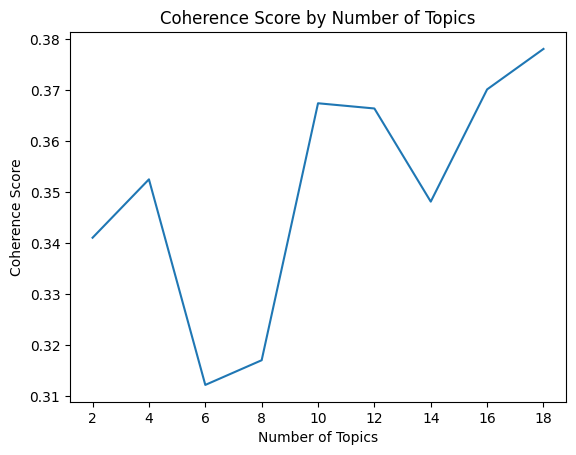

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, processed_reviews, start=2, limit=20, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=500)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=processed_reviews, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence scores
model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_reviews)

# Plot coherence scores
x = range(2, 20, 2)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()


In [ ]:
# Train LDA model with the chosen number of topics
num_topics = 17  # Adjust based on coherence score analysis
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=500)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the top keywords in each topic
for topic_id, topic in lda_model.print_topics(-1):
    print(f"Topic {topic_id+1}: {topic}\n")


Topic 1: 0.052*"laptop" + 0.022*"day" + 0.018*"one" + 0.017*"mi" + 0.016*"give" + 0.016*"issue" + 0.014*"say" + 0.014*"help" + 0.014*"hour" + 0.013*"call"

Topic 2: 0.057*"performance" + 0.043*"use" + 0.038*"worth" + 0.032*"price" + 0.031*"month" + 0.024*"team" + 0.023*"poor" + 0.023*"m" + 0.023*"buy" + 0.022*"best"

Topic 3: 0.103*"product" + 0.071*"hang" + 0.068*"bad" + 0.050*"laptop" + 0.035*"dont_buy" + 0.032*"even" + 0.031*"buy" + 0.025*"waste_money" + 0.020*"please" + 0.018*"go"

Topic 4: 0.201*"good" + 0.151*"product" + 0.068*"laptop" + 0.043*"best" + 0.042*"nice" + 0.036*"quality" + 0.032*"value_money" + 0.022*"also" + 0.019*"fast" + 0.018*"student"

Topic 5: 0.057*"good" + 0.043*"screen" + 0.041*"laptop" + 0.031*"dont" + 0.021*"go" + 0.017*"performance" + 0.016*"port" + 0.016*"slow" + 0.014*"usb" + 0.013*"gb_ram"

Topic 6: 0.100*"slow" + 0.074*"laptop" + 0.046*"start" + 0.039*"use" + 0.034*"like" + 0.029*"need" + 0.023*"browser_support_html_video" + 0.018*"processor" + 0.016*"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print only the keywords for each topic
for topic_id, topic in lda_model.print_topics(-1):
    # Split each topic into individual terms with their weights
    words_only = [word.split("*")[1].replace('"', '').strip() for word in topic.split(" + ")]
    print(f"Topic {topic_id+1}: {', '.join(words_only)}\n")


Topic 1: laptop, day, one, mi, give, issue, say, help, hour, call

Topic 2: performance, use, worth, price, month, team, poor, m, buy, best

Topic 3: product, hang, bad, laptop, dont_buy, even, buy, waste_money, please, go

Topic 4: good, product, laptop, best, nice, quality, value_money, also, fast, student

Topic 5: good, screen, laptop, dont, go, performance, port, slow, usb, gb_ram

Topic 6: slow, laptop, start, use, like, need, browser_support_html_video, processor, dell, microsoft_team

Topic 7: product, time, get, laptop, deliver, display, start, purchase, month, seem

Topic 8: laptop, turn, find, worth_money, heat, also, time, go, take, amd

Topic 9: good, laptop, price, buy, get, overall, receive, even, screen, performance

Topic 10: speed, good, laptop, slow, boot, time, performance, processing, sound, one

Topic 11: laptop, product, day, buy, review, want, item, first, get, without

Topic 12: laptop, hp, much, good, work, sound, purchase, price, great, battery_life

Topic 13

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate coherence score for the final model
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_reviews, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.3498504078882778


In [ ]:
# Prepare pyLDAvis visualization
pyLDAvis.enable_notebook()  # Use pyLDAvis.show(lda_display) if running outside a notebook
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
lda_display


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.081718 -0.083341       1        1  10.122052
0     -0.039336  0.160146       2        1   9.103326
13     0.059659 -0.099289       3        1   8.476127
4      0.111923 -0.091330       4        1   7.776611
8     -0.002311 -0.077827       5        1   6.189787
3     -0.158562 -0.227902       6        1   6.183109
10    -0.073512  0.059634       7        1   5.819230
11     0.092761 -0.014136       8        1   5.531949
6     -0.089610  0.043333       9        1   5.412340
2     -0.242855  0.029466      10        1   5.250929
16    -0.034681  0.086644      11        1   5.207053
14    -0.003160 -0.035050      12        1   4.980403
9      0.105873 -0.011106      13        1   4.640943
12     0.006022  0.023585      14        1   4.467923
5      0.013744  0.077716      15        1   4.306766
1      0.108523  0.052745      16        1   4.010790
7      0.063804  0.106712      17        1   2.520661, topic_info=         Term        Freq       Total Category  logprob  loglift
16    product  132.000000  132.000000  Default  30.0000  30.0000
3        good  189.000000  189.000000  Default  29.0000  29.0000
6        slow   55.000000   55.000000  Default  28.0000  28.0000
147      hang   29.000000   29.000000  Default  27.0000  27.0000
0         bad   38.000000   38.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
4      laptop    7.661434  271.542396  Topic17  -2.9562   0.1127
129     would    1.616400   13.809148  Topic17  -4.5121   1.5355
57   purchase    2.277196   32.724476  Topic17  -4.1694   1.0155
27        buy    2.677660   72.561331  Topic17  -4.0074   0.3812
56    problem    1.813750   28.821140  Topic17  -4.3970   0.9149

[900 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
529       3  0.720846  actually
529      12  0.180212  actually
131       3  0.218496       add
131       4  0.109248       add
131       7  0.218496       add
...     ...       ...       ...
130       5  0.158366       yet
130       6  0.158366       yet
130       9  0.158366       yet
130      11  0.475099       yet
422       3  0.807175   youtube

[2024 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 1, 14, 5, 9, 4, 11, 12, 7, 3, 17, 15, 10, 13, 6, 2, 8])

In [ ]:
# Get the dominant topic for each document
dominant_topics = []
for i, row in enumerate(lda_model[corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)
    dominant_topic = row[0][0]
    dominant_topics.append(dominant_topic)

# Add dominant topics to original DataFrame for analysis
data['Dominant_Topic'] = dominant_topics
print(data[['comments', 'Dominant_Topic']].head())


                                            comments  Dominant_Topic
0  Very slow and not good 8gb ram  according spee...               2
1  Really hate the product. Its wastage of money....              16
2                               The Product Worth it               1
3  Your browser does not support HTML5 video.\r\n...              14
4  This is  a review after more than 6 months of ...               1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate topic distribution
topic_counts = pd.Series(dominant_topics).value_counts()
topic_distribution = topic_counts / len(dominant_topics)

# Display topic distribution
for i, proportion in topic_distribution.items():
    print(f"Topic {i+1}: {proportion:.2%}")


Topic 4: 17.22%
Topic 3: 7.63%
Topic 6: 7.24%
Topic 5: 6.46%
Topic 15: 5.87%
Topic 14: 5.68%
Topic 1: 5.68%
Topic 2: 5.28%
Topic 12: 5.28%
Topic 16: 5.09%
Topic 7: 4.70%
Topic 17: 4.70%
Topic 9: 4.70%
Topic 10: 4.50%
Topic 11: 4.31%
Topic 13: 3.13%
Topic 8: 2.54%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


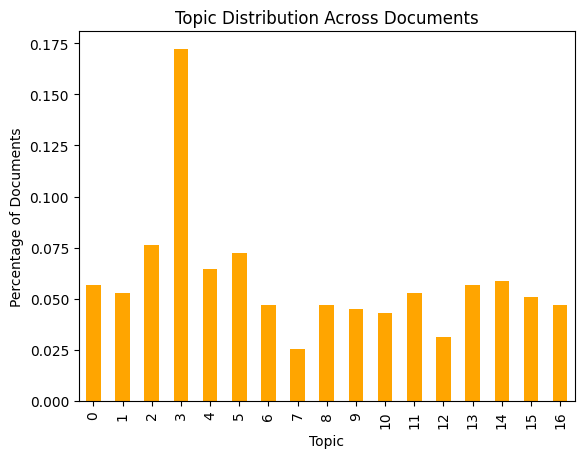

In [ ]:
topic_distribution.sort_index().plot(kind='bar', color="orange")
plt.xlabel("Topic")
plt.ylabel("Percentage of Documents")
plt.title("Topic Distribution Across Documents")
plt.show()

# **Project Report**

1. To get popular topics from laptop reviews, i used **Latent Dirichlet allocation (LDA)**
2. Preprocessed the reviews using **NLTK** (Removed html tags, punctuations, and numbers, converted to lowercase, tokenized and lemmatized)
3. Using **Phrases** from **Genism.models** found bigrams and trigrams
4. Build dictionary and corpus, to feed the **LDA Model**
5. Trained the LDA model with 500 epochs for differet number of topics to find the right number of topics based on their **Cohrence Score**. By increasing the the number of epochs to 500, model's performance increased to find meaningful topics increased.   
6. The Graph b/w Cohrence Score and Number of topics shows that cohrence score increses as the number of topics increases.
7. So i trained the LDA model with 500 epochs for 17 Topics
8. I used **pyLDAvis** to visually show the popular topics and the words count contributing to topics.
9. Size of the circle represents the prevalence of that topic across the corpus. Larger circles indicate more prominent topics
10. Distance between circles shows how similar topics are to each other.


*   Close circles represent similar topics with overlapping word distributions
*   Distant circles represent distinct topics with little overlap


11. Right Panel shows bar chart of Top Words in the Selected Topic.
When you click on a topic circle on the left, the bar chart on the right updates to display the top words in that topic.

  **Red Bars:** Represent the frequency of each word within the selected topic.

  **Blue Bars:** Represent the overall frequency of each word across all topics in the corpus.

12. The **λ slider** at the top of the right panel controls how words are ranked by relevance to the topic. This lets you adjust how specific or general the displayed words are:

  a) **λ = 1:** Displays words in descending order of frequency within the topic (higher frequency words appear first).

  b) **λ = 0:** Shows words that are highly specific to the selected topic, helping to identify the unique terms that define it.

  c) **Intermediate Values:** A mix of both general and specific terms.

13. In the last, I calculated topic distribution in overall corpus. Topic 4 represents highest distribution of **17.22%**


